# What's the terminal velocity of a raindrop? 
Nathan Moore, Winona State University

This is a "juypter notebook" which is essentially a python program with "markdown" text output.  Its something like a Mathematica notebook or Matlab program, but free. For an intro, see https://swcarpentry.github.io/python-novice-gapminder/01-run-quit/

In [1]:
# These are some libraries I'm going to use
from math import *
import matplotlib.pyplot as plt

Here are a few raindrop assumptions:

In [2]:
d=1.0 # water density, grams/cm^3
r=1.0 # radius, in mm
vol=(4.0/3.0)*pi*r**3 # volume, in mm^3, note 2**3 = 2^3 = 8
print("our raindrop has radius, r = ",r,"mm")
print("this raindrop has volume, v = ", vol, "mm^3")
# note, to find mass, (mm^3) * (grams/cm^3) *(1cm/10mm)^3 to make the units work
m = vol*d*(1.0/(10.0**3)) # mass (grams)
print("this raindrop has mass, m = ",m,"grams")

our raindrop has radius, r =  1.0 mm
this raindrop has volume, v =  4.1887902047863905 mm^3
this raindrop has mass, m =  0.0041887902047863905 grams


Rain falls from clouds, and is subject to two main forces, weight, $W=mg$, (gravitational attraction from the earth), and a drag force from the air molecules it runs into as it moves, $F_D$.  For sufficiently large raindrops, we can model for drag force with the following term. 

$F_D=0.5 C d A v^2$,

where $C=0.45$ for a sphere, $d=1.2kg/m^3$ is the density of air, $A=\pi r^2$ is the cross sectional area of the raindrop, and $v$ is the raindrop's speed.  

As the drop falls, it gains momentum because of the downward pull of the earth.  As the drop accelerates, the speed increases, and so does the drag force.  Eventually, the weight force from the earth and the drag force from the atmosphere equilibrate, and the drop reaches its *terminal velocity*, $v_T$, which can be computed by equating the two interactions.

$mg = 0.5 C d A (v_T)^2$

Or,

$v_T = \left[ \frac{2 m g}{C d A} \right]^{0.5}$.

Now, algebraically, $m=Volume*density_{water}=\frac{4}{3} \pi r^3 d_{w}$, and $A=\pi r^2$, so, the terminal velocity can be expressed as,

$v_T = \left[ \frac{2 \left(\frac{4}{3} \pi r^3 d_{water}\right) ~g}{C d_{air} \pi r^2} \right]^{0.5} 
= \left[ \frac{ 8 r g}{3C}\frac{ d_{water} }{ d_{air} } \right]^{0.5}$

Recall that the drag coefficient, $C=0.45$ has no units.  The other units in the terminal velocity expression are mixed and we'll have to work them out to plot the terminal speed. Here's a version with mixed units: 

$v_T = \left[ \frac{ 2 (1mm) (9.8m/s^2)}{3C}\frac{ 1 grams/cm^3 }{  1.2 kg/m^3 } \right]^{0.5}$

Here's a version of the same expression with explicit unit conversions included.

$v_T = \left[ \frac{ 8 (1mm) (9.8m/s^2)~ \left(\frac{1m}{1000mm}\right) }{3C} 
\frac{ 1 grams/cm^3 ~ \left(\frac{100cm}{1m}\right)^3 \frac{1kg}{1000g} }{  1.2 kg/m^3 } \right]^{0.5}$

In [3]:
g=9.8
C=0.45
r=1 # in mm
dw=1 # grams/cm^3
da=1.2 #  kg/m^3
v_T_sqr=(8*r*g/(3*C*1000))*(dw*100**3/(1000*da))
v_T=sqrt(v_T_sqr)
print("estimated terminal velocity for a r = ",r," mm raindrop is ",v_T,"m/s")

estimated terminal velocity for a r =  1  mm raindrop is  6.956655929999346 m/s


Ok, so now that we have an expression that seems to work, we'll make a plot that shows the terminal speed as a function of the raindrop size.

In [15]:
# plots require a list of points to plot
list_of_r=[] # list of radaii, in mm
list_of_v=[] # list of terminal velocities, in m/s

# this is a for (or for-each) loop.  It repeats the lines below with 
# i=0, i=1, i=2 ... up to but not including i=30
for i in range(30):
    # this is the repeated commands tat the forloop runs
    
    # vary the radius (in mm, incremented by 0.1mm steps)
    r=0.1+i*0.1
    #print(i,r)
    
    # save this loop's radius in a list
    list_of_r.append(r)
    
    # using the code above, compute the terminal velocity at this radius
    # note that we're using C,g,dw,da defined above
    v_T_sqr=(8*r*g/(3*C*1000))*(dw*100**3/(1000*da))
    v_T=sqrt(v_T_sqr)
    # and save this value as well
    list_of_v.append(v_T)

# end of tabbed in section means the loop is over

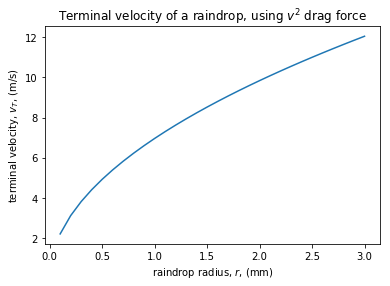

In [16]:
# now, make a plot
plt.plot(list_of_r,list_of_v)
plt.ylabel("terminal velocity, $v_T$, (m/s)")
plt.xlabel("raindrop radius, $r$, (mm)")
plt.title("Terminal velocity of a raindrop, using $v^2$ drag force")
plt.show()

Note, the internet tells me that most raindrops are 4mm diameter (2mm radius) or smaller.  https://water.usgs.gov/edu/raindropsizes.html

See also, figure 3 in `http://journals.ametsoc.org/doi/pdf/10.1175/1520-0477(2001)082<1169%3AWIARSD>2.3.CO%3B2`


# How much pressure does a raindrop exert on the ground?

A moving raindrop comes to a stop when it hits the ground because there's a contact interaction between the rain and the ground.  I've heard that erosion is caused by wind and water, so let's investigate this with an estimate.  How big is the stopping force or pressure that exists between the raindrop and the ground?

Before hitting the ground, the raindrop has a downward (terminal) velocity and a corresponding downward momentum.  The ground exerts an external force on the raindrop for a length of time, and the momentum disappears.  Mathematically, 

$P_1=mv_T$ and $P_2=0$ because $P_2-P_1=F_{external}~\Delta t$.

How long does it take the raindrop to splash?  Some engineers at Harvard recently investigated how Mosquitoes survive rainstorms (their conclusion, rain isn't a big deal for Mosquitoes).  In the course of that paper, they estimated that the raindrop-Mosquito interaction time is about 1ms. Here's the paper, http://www.pnas.org/content/109/25/9822.full

So then, we can estimate the raindrop-ground force as,

$F=\frac{m~v_T}{\Delta T}$.

Again, remember from above that:

$m=\frac{4}{3} \pi r^3 d_{w}$ and $v_T = \left[ \frac{ 8 r g}{3C}\frac{ d_{water} }{ d_{air} } \right]^{0.5}$

We could combine these into a single formula, but I don't think the resulting expression is particularly informative.  Instead, remember that the stopping force is spread over the ground, making a pressure, $P=F/A$.  The simplest estimate for the relevant area is that the force is spread over is the cross-sectional area of the raindrop, $A=\pi r^2$.  This gives an expression for raindrop pressure,

$P=\frac{F}{A}=\frac{m~v_T}{\Delta T~\left(\pi r^2\right)}=
\frac{\left(\frac{4}{3} \pi r^3 d_{w}\right)~v_T}{\Delta T~\pi r^2} =
\frac{4  ~r ~d_{w}~v_T}{3 ~\Delta T}$

$P=\frac{4  ~r ~d_{w}}{3 ~\Delta T} \left[ \frac{ 8 r g}{3C}\frac{ d_{water} }{ d_{air} } \right]^{0.5}$


The units are again mixed up.  A different way to resolve this is to have two sets of variables in python code - one that you use in the measurement (eg $r=1mm$), and another in standard mks units that you use in the calculation.

In [17]:
delta_T_ms = 1 # ms
delta_T = delta_T_ms*(1.0/1000.0) # seconds
#
r_mm = 1 # mm
r = r_mm*(1.0/1000.0) # meters  
#
d_w_gpcm3 = 1 # grams per cm^3
d_w = d_w_gpcm3*(1.0/1000.0)*(100.0/1.0)**3 # kg/m^3
#
d_air = 1.2 # kg/m^3$
C = 0.45
g = 9.8 # m/s^2
P=(4.0*r*d_w/(3.0*delta_T))*(8.0*r*g*d_w/(3*C*d_air))**0.5
# echoing out all of the calculation parameters as a check of the unit conversions 
print("Inputs:")
print("raindrop radius r = ",r," m ")
print("impact time dt = ",delta_T," s")
print("water density d_w = ",d_w," kg/m^3")
print("air density d_air = ",d_air," kg/m^3")
print("Spherical drag coefficient, C = ",C)
print("g = ",g)
print("Computed pressure, P = ",P,"Newtons/m^2")
# note, Newtons/m^2 is a "Pascal (Pa)", and 6894.76Pa = 1psi
P_psi = P*(1.0/6894.76)
print("Computed pressure, P = ",P_psi,"psi")

Inputs:
raindrop radius r =  0.001  m 
impact time dt =  0.001  s
water density d_w =  1000.0  kg/m^3
air density d_air =  1.2  kg/m^3
Spherical drag coefficient, C =  0.45
g =  9.8
Computed pressure, P =  9275.541239999127 Newtons/m^2
Computed pressure, P =  1.34530298951655 psi


So, how does the Pressure depend on raindrop size? We'll use the looping structure from above.

In [19]:
# plots require a list of points to plot
list_of_r=[] # list of radaii, in mm
list_of_p=[] # list of pressures, in psi

# this is a for (or for-each) loop.  It repeats the lines below with 
# i=0, i=1, i=2 ... up to but not including i=30
for i in range(30):
    # this is the repeated commands tat the forloop runs
    
    # vary the radius (in mm, incremented by 0.1mm steps)
    r_mm=0.1+i*0.1
    #print(i,r)
    
    # save this loop's radius in a list
    list_of_r.append(r_mm)
    
    # convert the radius to (standard) units of m
    r = r_mm*(1.0/1000.0) # meters  

    # using the code above, compute the terminal velocity at this radius
    # note that we're using C,g,dw,da defined above
    P=(4.0*r*d_w/(3.0*delta_T))*(8.0*r*g*d_w/(3*C*d_air))**0.5
    P_psi = P_psi = P*(1.0/6894.76)
    # and save this value as well
    list_of_p.append(P_psi)

# end of tabbed in section means the loop is over

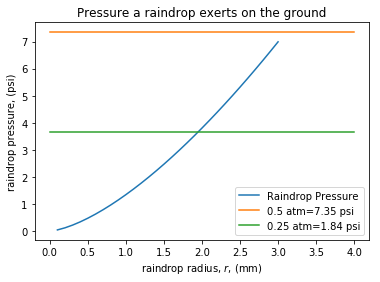

In [31]:
# now, make a plot
p_atm=14.69 #atmospheric pressure (psi)
plt.plot(list_of_r,list_of_p,label="Raindrop Pressure")
plt.plot([0,4],[p_atm/2,p_atm/2],label="0.5 atm=7.35 psi")
plt.plot([0,4],[p_atm/4,p_atm/4],label="0.25 atm=1.84 psi")
plt.ylabel("raindrop pressure, (psi)")
plt.xlabel("raindrop radius, $r$, (mm)")
plt.title("Pressure a raindrop exerts on the ground")
plt.legend()
plt.show()

**Caveats**
1. To find the terminal velocity of the raindrop, I assumed the drag force is quadratic in speed, $F\approx b v^2$.
2. I assumed constant air density of $1.2kg/m^3$.  Air pressure (and density) change with elevation and weather pattern.
3. I assumed that the raindrop-ground collision takes $1ms$.
4. I assumed that the raindrop collision was spread over the raindrop's cross-sectional area, $A=\pi r^2$.
5. Literature suggests that raindrops are roughly $r=0.2mm$ or smaller, so the horizontal scale of my graph is somewhat exaggerated.


# What force does the raindrop exert on the ground?
 Recall that earlier, we estimated the raindrop-ground force as,

$F=\frac{m~v_T}{\Delta T}$.

Again, remember from above that:

$m=\frac{4}{3} \pi r^3 d_{w}$ and $v_T = \left[ \frac{ 8 r g}{3C}\frac{ d_{water} }{ d_{air} } \right]^{0.5}$

What does a plot of this look like?

In [24]:
#redefine constants so that this code can be stand-alone
delta_T_ms = 1 # ms
delta_T = delta_T_ms*(1.0/1000.0) # seconds
#
d_w_gpcm3 = 1 # grams per cm^3
d_w = d_w_gpcm3*(1.0/1000.0)*(100.0/1.0)**3 # kg/m^3
#
d_air = 1.2 # kg/m^3$
C = 0.45
g = 9.8 # m/s^2

# plots require a list of points to plot
list_of_r=[] # list of radaii, in mm
list_of_f=[] # list of forces, in N

# this is a for (or for-each) loop.  It repeats the lines below with 
# i=0, i=1, i=2 ... up to but not including i=30
for i in range(30):
    # this is the repeated commands tat the forloop runs
    
    # vary the radius (in mm, incremented by 0.1mm steps)
    r_mm=0.1+i*0.1
    #print(i,r)
    
    # save this loop's radius in a list
    list_of_r.append(r_mm)
    
    # convert the radius to (standard) units of m
    r = r_mm*(1.0/1000.0) # meters  

    # mass, in kg
    m=(4.0/3.0)*pi*(r**3)*d_w
   
    # terminal velocity
    v_T=(8.0*r*g*d_w/(3*C*d_air))**0.5
    
    # force, N
    F=m*v_T/delta_T
    list_of_f.append(F)
    
# end of tabbed in section means the loop is over

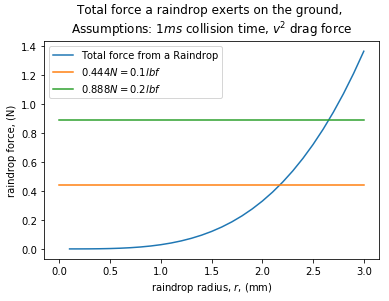

In [32]:
plt.plot(list_of_r,list_of_f,label="Total force from a Raindrop")
plt.plot([0,3],[0.444,0.444],label="$0.444N = 0.1lbf$")
plt.plot([0,3],[0.888,0.888],label="$0.888N = 0.2lbf$")
plt.ylabel("raindrop force, (N)")
plt.xlabel("raindrop radius, $r$, (mm)")
plt.title("Total force a raindrop exerts on the ground, \nAssumptions: $1ms$ collision time, $v^2$ drag force")
plt.legend()
plt.show()